<a href="https://colab.research.google.com/github/dpiponi/dice-nine/blob/main/dice9_examples_based_on_rpg_stackexchange_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!git clone https://github.com/dpiponi/dice-nine.git
%cd dice-nine
!pip install --force-reinstall .

Cloning into 'dice-nine'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 58 (delta 6), reused 57 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 50.31 KiB | 6.29 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/dice-nine/dice-nine
Processing /content/dice-nine/dice-nine
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dice9: filename=dice9-0.1.0-py3-none-any.whl size=36491 sha256=9f4440932f3c9f05ed3c8314e4a7289b4f85a1ee35401fb0dafeb9ff2ebfa9d8
  Stored in directory: /root/.cache/pip/wheels/50/7b/34/9eb0772c476b8f92c88373c8e8478905d30005d1d9f440e198
Successfully built dice9
  Attempting uninstall: dice9
    Found existing installation: dice9 0.1.0
    Uninstalling dice9-0.1.0:
      Successfully uninstalled dice9-0.1.0


In [24]:
import matplotlib.pyplot as plt
import os
os.environ["PL_PLATFORM"] = "np"
import dice9 as d9

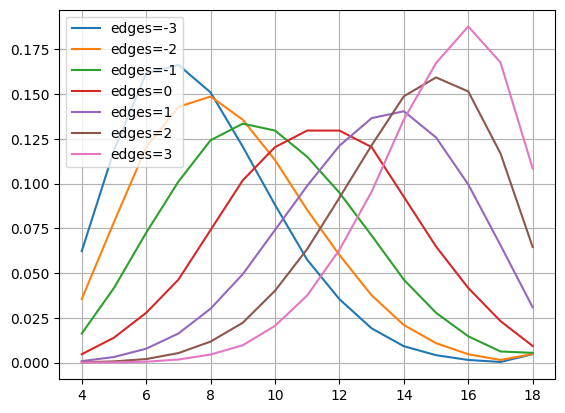

In [4]:
# https://rpg.stackexchange.com/questions/210644/how-to-simulate-d616-on-anydice

def die(i):
  return d[2 : 8 : 1] if i == 0 else d(6)

def rerolls(rolls, edges):
  total = reduce_sum(rolls)
  if edges == 0 or total == 19:
    result = total - int(rolls[0] == 7)
  elif edges > 0:
    # Other things equal, pick M-die as it is earlier
    i = argmin(rolls, -1)
    rolls[i] = max(die(i), rolls[i])
    result = rerolls(rolls, edges - 1)
  else:
    del total
    # Other things equal, pick non-M die so reverse order
    i = 2 - argmax(flip(rolls))
    rolls[i] = min(die(i), rolls[i])
    result = rerolls(rolls, edges + 1)
  return result

def f(edges):
  rolls = list(die(i) for i in range(3))
  return rerolls(rolls, edges)

for edges in range(-3, 4):
  pmf = d9.run(f, edges)
  plt.grid(True)
  plt.plot(pmf.keys(), pmf.values(), label=f"edges={edges}")
plt.legend()
plt.show()

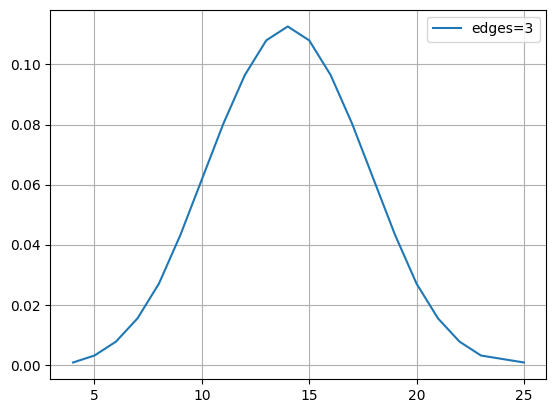

In [5]:
# https://rpg.stackexchange.com/questions/190800/how-do-i-implement-this-specialized-roll-and-keep-mechanic-in-anydice

def f(roll, keep):
  x = sort(list(roll @ d(6)))
  # XXX Need proper variables in slices.
  # See code in d[...]
  return reduce_sum(x[::]) + reduce_sum(x[:1] == 6)

pmf = d9.run(f, 4, 3)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"edges={edges}")
plt.legend()
plt.show()

transformed code:
def f(rolls, sides):
    multipliers = [1, 3, 2]
    counts = zeros(7)
    total = 0
    for die in move(rolls) @ d(6):
        count = counts[die]
        total += multipliers[count] * die
        counts[die] = min(move(count) + 1, 2)
    return move(total)
def zeros(shape):
    return __inline_impl__(zeros_impl, move(shape))


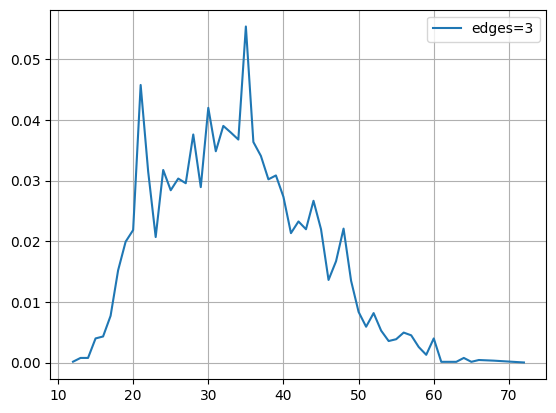

In [6]:
# https://rpg.stackexchange.com/questions/215809/using-anydice-to-calculate-duplicate-dice-doubling

# The first time we see a number we add it
# The second time we add triple it
#  - I don't make the rules, that's what was asked for.
# The subsequent times we add double

def f(rolls, sides):
  multipliers = [1, 3, 2]
  counts = zeros(7)
  total = 0
  # XXX Don't do moves inside an @
  # Maybe do the expr twice
  # (Though in you may be able to do one immediately after.)
  for die in rolls @ d(6):
    count = counts[die]
    total += multipliers[count] * die
    counts[die] = min(count + 1, 2)

  return total

pmf = d9.run(f, 6, 6, show_analysis=True)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"edges={edges}")
plt.legend()
plt.show()

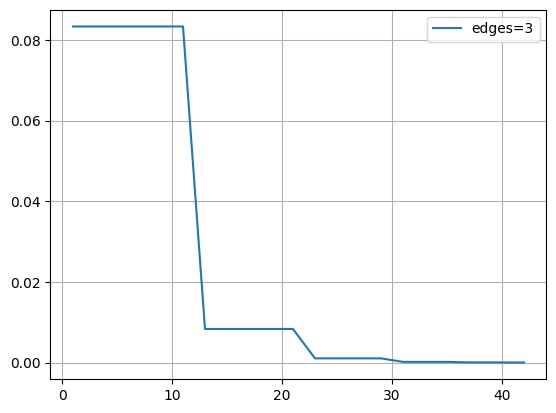

In [7]:
# https://rpg.stackexchange.com/questions/214181/how-can-i-get-this-explode-function-in-anydice-to-work

def explode(n, sides):
  roll = d(sides[0])
  if n > 1:
    if roll == sides[0]:
      roll += explode(n - 1, sides[1:])
  return roll

def f():
  # XXX print better error for argument mismatch (incl. range)
  # XXX better message for early return
  return explode(6, [12, 10, 8, 6, 4, 2])

pmf = d9.run(f, normalize=True)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"edges={edges}")
plt.legend()
plt.show()

In [8]:
# https://rpg.stackexchange.com/questions/214181/how-can-i-get-this-explode-function-in-anydice-to-work

def explode(n, sides):
  roll = 0
  if n > 0:
    roll = d(sides[0])
    if roll == sides[0]:
      roll += explode(n - 1, sides[1:])
  return roll

def f():
  sides = [12, 10, 8, 6, 4, 2]
  return explode(6, sides)

pmf = d9.run(f, normalize=True)
print(pmf)

{(np.int64(1),): np.float64(0.08333333333333333), (np.int64(2),): np.float64(0.08333333333333333), (np.int64(3),): np.float64(0.08333333333333333), (np.int64(4),): np.float64(0.08333333333333333), (np.int64(5),): np.float64(0.08333333333333333), (np.int64(6),): np.float64(0.08333333333333333), (np.int64(7),): np.float64(0.08333333333333333), (np.int64(8),): np.float64(0.08333333333333333), (np.int64(9),): np.float64(0.08333333333333333), (np.int64(10),): np.float64(0.08333333333333333), (np.int64(11),): np.float64(0.08333333333333333), (np.int64(13),): np.float64(0.008333333333333333), (np.int64(14),): np.float64(0.008333333333333333), (np.int64(15),): np.float64(0.008333333333333333), (np.int64(16),): np.float64(0.008333333333333333), (np.int64(17),): np.float64(0.008333333333333333), (np.int64(18),): np.float64(0.008333333333333333), (np.int64(19),): np.float64(0.008333333333333333), (np.int64(20),): np.float64(0.008333333333333333), (np.int64(21),): np.float64(0.008333333333333333),

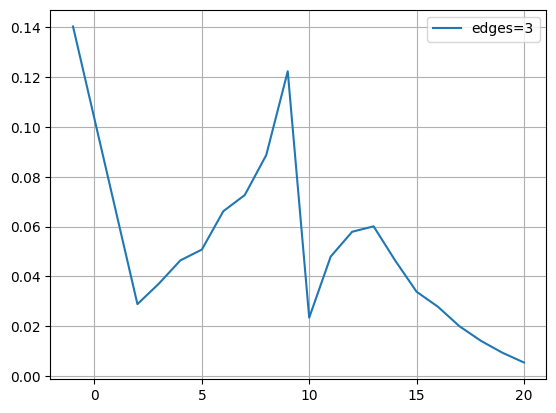

In [9]:
# https://rpg.stackexchange.com/questions/213798/beating-a-dc-using-a-pool-of-polyhedral-dice-while-maximizing-the-sum-of-remaini

# XXX Make sort() incremental so we can use sorted array

def f():
  r = sort([d(12), d(8), d(8), d(6)])
  best_rem = -1
  total = reduce_sum(r)
  for i in range(3):
    for j in range(4 - i - 1):
      j += i + 1
      r2 = r[i] + r[j]
      if r2 >= 10:
        best_rem = max(best_rem, total - r2)

  return best_rem

pmf = d9.run(f, normalize=True)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"edges={edges}")
plt.legend()
plt.show()

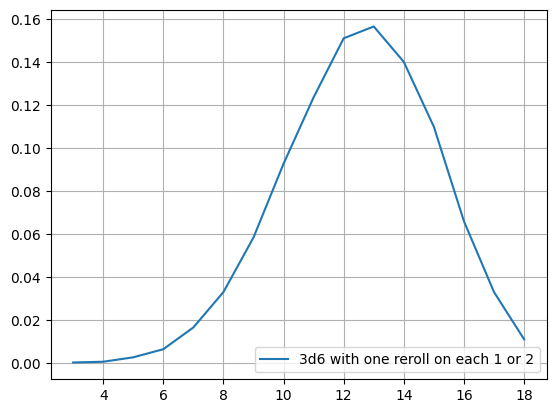

In [10]:
# https://rpg.stackexchange.com/questions/174505/how-can-i-calculate-the-distribution-of-3d6-keep-and-rerolling-any-1s-and-2s-o

def rerolled():
  x = d(6)
  return x if x >= 3 else d(6)

def f():
  return sum(*(3 @ rerolled()))

# XXX Deal with analysis here! Eval order probably incorrect.
pmf = d9.run(f, static_analyse=False, show_analysis=True)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"3d6 with one reroll on each 1 or 2")
plt.legend()
plt.show()

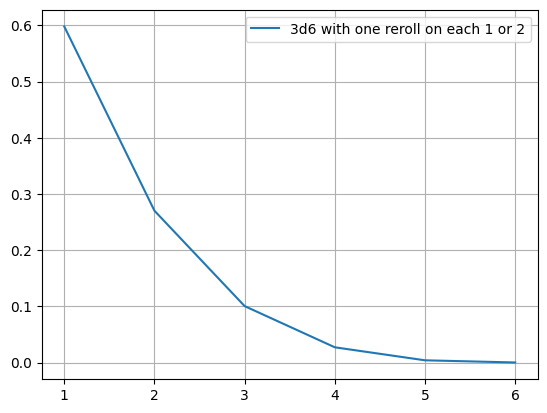

In [11]:
def f():
  a = []
  for r in 5 @ d(6):
    a = sort(concat([a, [r]], -1))
  return a[0]

# XXX Deal with analysis here! Eval order probably incorrect.
pmf = d9.run(f, static_analyse=False, show_analysis=True)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"3d6 with one reroll on each 1 or 2")
plt.legend()
plt.show()

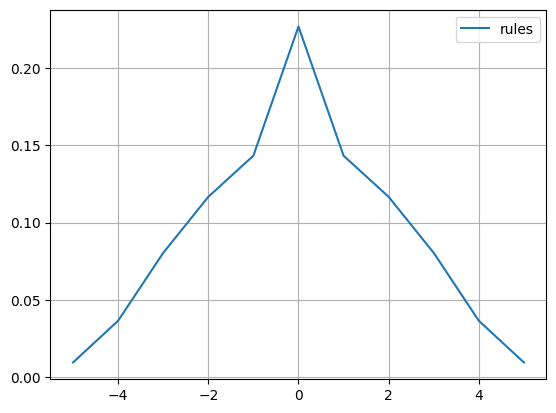

In [12]:
# https://rpg.stackexchange.com/questions/112735/modelling-opposed-dice-pools-with-a-swap

# XXX need to be able to discard matching dice or similar

def f():
  a = []
  for r in 5 @ d(6):
    a = sort(concat([a, [r]], -1))

  b = []
  for r in 5 @ d(6):
    b = sort(concat([b, [r]], -1))

  count1 = reduce_sum(reduce_max(b) <= a)
  count2 = reduce_sum(reduce_max(a) <= b)

  result = count1 - count2

  return result

# XXX Deal with analysis here! Eval order probably incorrect.
pmf = d9.run(f, static_analyse=False, show_analysis=True)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"rules")
plt.legend()
plt.show()

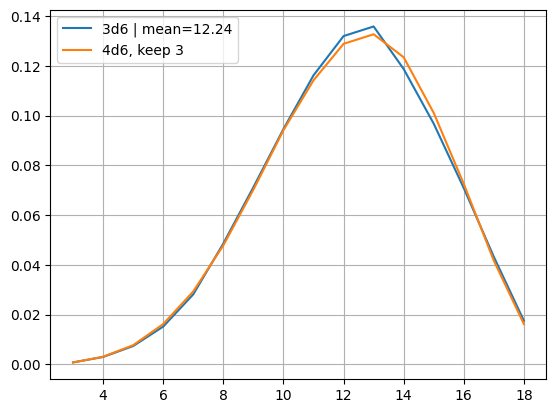

In [13]:
def f():
  t = sum(*(297 @ d(6)))
  s = sum(*(3 @ d(6)))
  assert s + t == 1224
  return s

def g(rolls, keeps):
  return reduce_sum(top_k(list(rolls @ d(6)), keeps))

pmf1 = d9.run(f, normalize=True)
pmf2 = d9.run(g, 4, 3)
plt.grid(True)
plt.plot(pmf1.keys(), pmf1.values(), label=f"3d6 | mean=12.24")
plt.plot(pmf2.keys(), pmf2.values(), label=f"4d6, keep 3")
plt.legend()
plt.show()

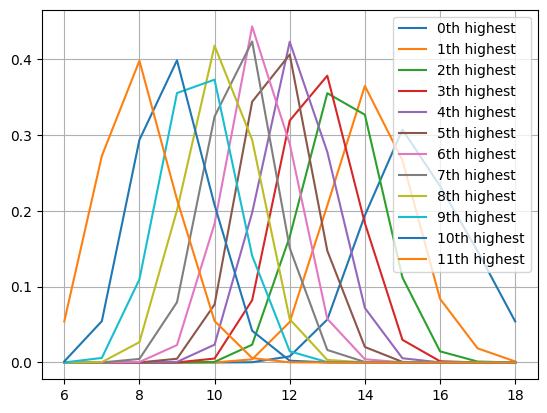

In [14]:
# https://rpg.stackexchange.com/questions/204051/i-need-a-standard-array-for-a-dd-like-homebrew-game-but-anydice-chokes-how
# Cf. https://highdiceroller.github.io/icepool/apps/icecup.html?p=eq&v=2.1.0&c=GYJw9gtgBAlgxgUwA5jAG1hFIAuUAiMCAUMQHYCuEA+gM5xggK1QC8UAjAEyl7uEIAFAG0uAGgDMksQBYxAVjEA2ALoBKYgEMARjDQwcATzZQJUAAJQcxFOhM69BwwDpbaQZRr1GzDcWCMsLBkUCCaZADmQp50DEy0agBcxFCpUGAUOEiZgm7CMOrEQA

import numpy as np

# For a given n we count how many stats end up > n.
# We can parlay this into the distribution for the
# kth ranked stat by noticing that the claim
#
#   the kth ranked stat <= n
#
# is equivalent to the claim
#
#   the number of stats > n is <= k.
def f(rolls, n):
  return sum(*(int(i > n)
               for i in rolls @ sum(*(3 @ d[2:4:1, 3:5:1, 5:7:1]))))

plt.grid(True)
rolls = 12
cdf = {}
for k in range(rolls):
  cdf[k] = []

for n in range(6, 19):
    pmf = d9.run(f, rolls, n, squeeze=True)
    for k in range(rolls):
      p = sum(pmf.get(i, 0) for i in range(0, k + 1))
      cdf[k].append(p)

for k in range(rolls):
  probs = np.diff(np.concat([[0], cdf[k]]))
  plt.plot(range(6, 19), probs, label=f"{k}th highest")

plt.legend()
plt.show()

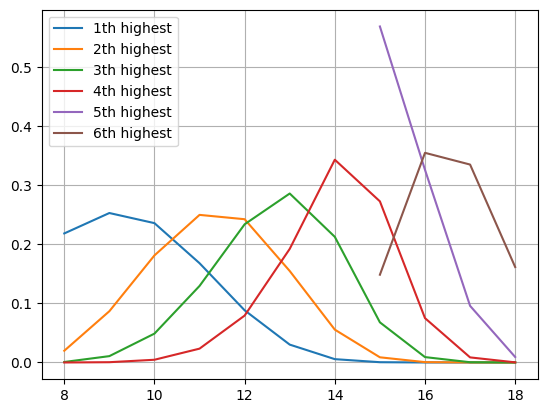

In [15]:
# https://rpg.stackexchange.com/questions/156379/how-does-one-calculate-the-distribution-of-the-matt-colville-way-of-rolling-stat

def g():
    r = reduce_sum(top_k(list(4 @ d(6)), 3), axis=-1)
    assert r >= 8
    return r

def sorted_list(s):
    l = []
    for i in s:
        l = sort(concat([[i], l], -1), -1)
    return l

def f(index):
    v = sorted_list(6 @ g())
    # Top 2
    assert v[4] >= 15
    return v[index]

for i in range(6):
  pmf = d9.run(f, i, normalize=True, squeeze=True)
  plt.grid(True)
  plt.plot(pmf.keys(), pmf.values(), label=f"{i + 1}th highest")
plt.legend()
plt.show()

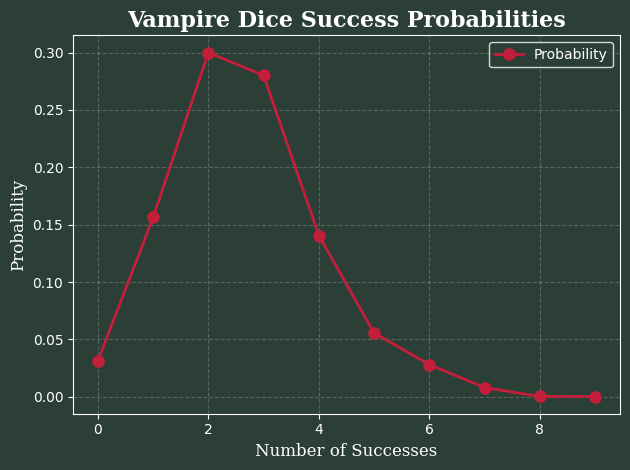

In [16]:
# https://rpg.stackexchange.com/questions/177757/how-to-calculate-vampire-the-masquerade-5-odds-on-anydice

def f():
  roll = list(5 @ d(10))
  return reduce_sum(roll > 5) + (reduce_sum(roll == 10) // 2) * 2

pmf = d9.run(f)
x = pmf.keys()
y = pmf.values()

fig, ax = plt.subplots(facecolor='#2C3F36')      # Dark marble green
ax.set_facecolor('#2C3F36')

ax.plot(x, y, color='#C41E3A', marker='o', linestyle='-', linewidth=2, markersize=8, label='Probability')

ax.tick_params(colors='#FFFFFF')
ax.xaxis.label.set_color('#FFFFFF')
ax.yaxis.label.set_color('#FFFFFF')
ax.title.set_color('#FFFFFF')

ax.set_title('Vampire Dice Success Probabilities', fontsize=16, fontweight='bold', family='serif')
ax.set_xlabel('Number of Successes', fontsize=12, family='serif')
ax.set_ylabel('Probability', fontsize=12, family='serif')

ax.grid(True, linestyle='--', color='#FFFFFF', alpha=0.2)

for spine in ax.spines.values():
    spine.set_color('#FFFFFF')

ax.legend(facecolor='#2C3F36', edgecolor='#FFFFFF', labelcolor='#FFFFFF')

plt.tight_layout()
plt.show()

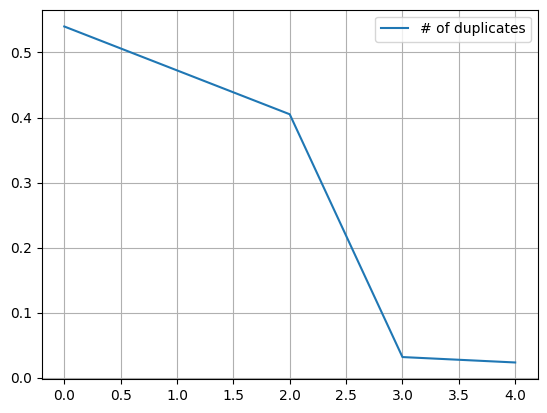

{(np.int64(0),): np.float64(0.5399999999999988), (np.int64(2),): np.float64(0.4050000000000002), (np.int64(3),): np.float64(0.03166666666666667), (np.int64(4),): np.float64(0.023333333333333345)}


In [17]:
# https://rpg.stackexchange.com/questions/179043/how-to-count-duplicates-in-a-mixed-pool-using-anydice
#
# NB disagrees with Ilmari Karonen's code wich claims a zero probability of
# 4 dupes with `output [dupes in 2d2 1d2 1d2]`
# but 0000, 1111, 0011 and so on all count as 4 dupes don't they?


def f():
    pool = {*(1 @ d(12)), *(2 @ d(10)), *(1 @ d(8))}
    counts = sum(*(one_hot(r, 13)
                   for r in pool))

    return reduce_sum(counts * int(counts > 1))

pmf = d9.run(f)

plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"# of duplicates")
plt.legend()
plt.show()
print(pmf)

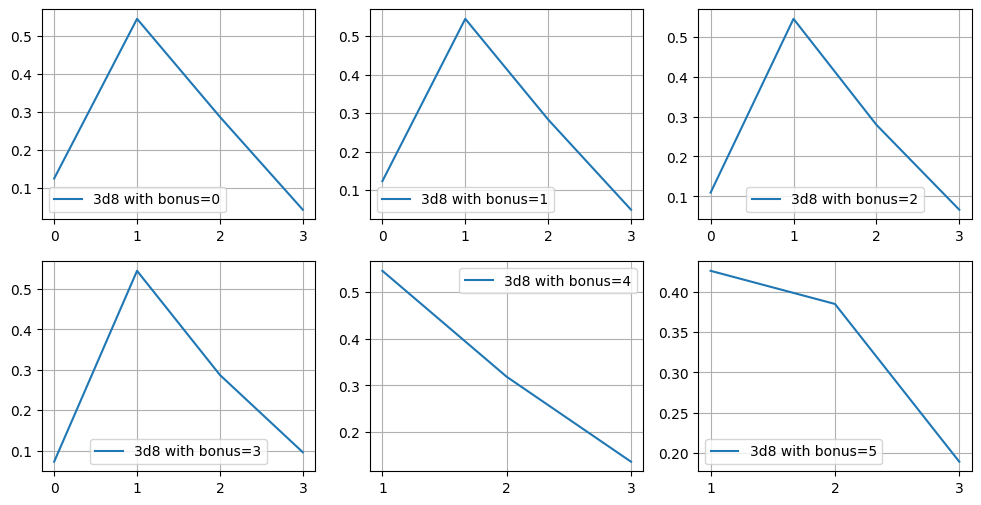

In [18]:
# https://rpg.stackexchange.com/questions/209293/help-with-anydice-for-custom-system

def f(rolls, bonus):
    x = sort(list(rolls @ d(8)), -1)
    x += one_hot(0, rolls) * bonus
    n8 = reduce_sum(x >= 8)
    if n8 >= 2:
        result = 3
    elif n8 >= 1:
        result = 2
    elif reduce_sum(x >= 5) >= 1:
        result = 1
    else:
        result = 0
    return result

rolls = 3
plt.figure(figsize=(12, 6))
for bonus in range(6):
  plt.subplot(2, 3, bonus + 1)
  pmf = d9.run(f, rolls, bonus, squeeze=True)
  plt.xticks(list(pmf.keys()))
  plt.grid(True)
  plt.plot(pmf.keys(), pmf.values(), label=f"{rolls}d8 with bonus={bonus}")
  plt.legend()
plt.show()

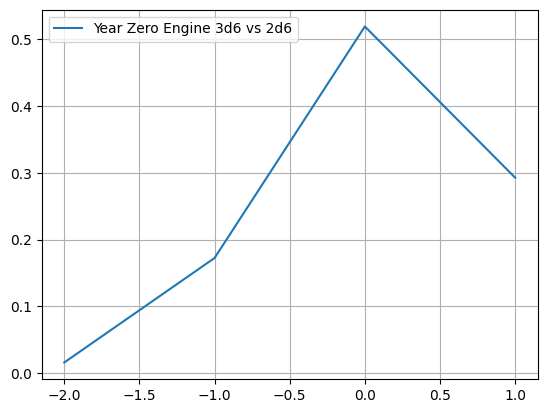

In [19]:
# https://rpg.stackexchange.com/questions/211031/anydice-how-to-model-opposed-rolls-from-yze

# XXX maybe - casts to int
# XXX sum(*you, *me) ought to work
def f():
    me = 3 @ (d(6) == 6)
    you = 2 @ (-int(d(6) == 6))
    return sum(*me, *you)

pmf = d9.run(f)
plt.grid(True)
plt.plot(pmf.keys(), pmf.values(), label=f"Year Zero Engine 3d6 vs 2d6")
plt.legend()
plt.show()

In [20]:
# https://rpg.stackexchange.com/questions/216045/what-would-an-anydice-function-to-calculate-odds-on-daggerhearts-duality-dice-l

def daggerheart_success():
    hope = d(12)
    fear = d(12)
    return hope == fear or hope + fear + 5 + d(6) >= 20

print(d9.run(daggerheart_success, squeeze=True))

{np.False_: np.float64(0.3217592592592593), np.True_: np.float64(0.6782407407407409)}


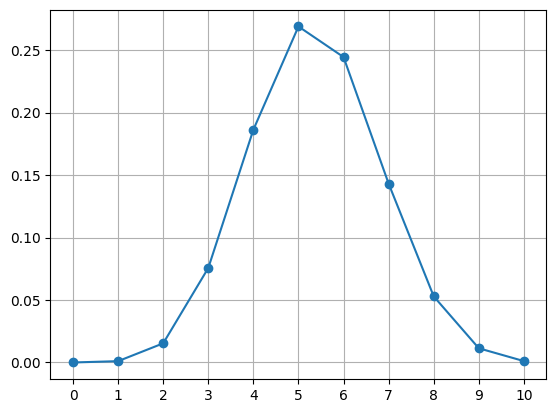

In [21]:
# https://math.stackexchange.com/questions/4403443/probability-of-rolling-n-dice-that-are-each-are-greater-than-or-equal-to-x-w

def grouped_pool(dice, sides):
    total = 0
    for j in range(sides):
        count = sum(*((d(sides - j) == 1 if i >= total else 0)
                      for i in range(dice)))

        total += count
        yield count
    del total

def f(focus, threshold, size, sides):
    successes = 0
    roll = sides
    for num in grouped_pool(size, sides):
        if roll >= threshold:
            successes += num
        else:
            shortfall = threshold - roll
            partials = min(num, focus // shortfall)
            successes += partials
            focus -= partials * shortfall

        roll -= 1

    return successes

pmf = d9.run(f, 3, 5, 10, 6, squeeze=True)
plt.grid(True)
plt.xticks(list(pmf.keys()))
plt.plot(pmf.keys(), pmf.values(), marker='o')
plt.show()

In [22]:
# https://rpg.stackexchange.com/questions/212909/help-with-counting-successes-with-multiple-target-numbers

def f(n, obstacles):
    rolled = sum(*(n @ one_hot(d(6), 7)))
    return reduce_all(cumsum(flip(rolled)) >= cumsum(flip(obstacles)))

result = d9.run(f, 7, [0, 0, 0, 0, 3, 1, 0], squeeze=True)
print(result)

{np.False_: np.float64(0.504129515317787), np.True_: np.float64(0.49587048468221295)}


In [23]:
def f():
    x = [[1, 2, 3],[4,5,6]]
    return x[:,1:3]

pmf = d9.run(f, squeeze=True)
print(pmf)

tuple (:, 1:3)
{((2, 3), (5, 6)): np.float64(1.0)}
